In [ ]:
# 导入必要的库
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factors.technical_factors import TechnicalFactors
from config.strategy_config import StrategyConfig

# 初始化配置
config = StrategyConfig("../config/default_config.yaml")
print("✅ 配置加载完成")

# 创建示例数据
dates = pd.date_range("2024-01-01", periods=50, freq="D")
symbols = ["000001", "000002", "600000", "600036"]

# 模拟价格数据
np.random.seed(42)
prices = pd.DataFrame(
    np.random.randn(50, 4).cumsum(axis=0) + 100,
    index=dates,
    columns=symbols
)

print(f"价格数据形状: {prices.shape}")
print(f"价格数据前5行:")
print(prices.head())


配置文件 ../config/default_config.yaml 加载成功
✅ 配置加载完成
价格数据形状: (50, 4)
价格数据前5行:
                000001      000002      600000      600036
2024-01-01  100.496714   99.861736  100.647689  101.523030
2024-01-02  100.262561   99.627599  102.226901  102.290465
2024-01-03   99.793086  100.170159  101.763484  101.824735
2024-01-04  100.035049   98.256879  100.038566  101.262447
2024-01-05   99.022218   98.571126   99.130542   99.850144


In [ ]:
# 计算技术因子
technical_factors = TechnicalFactors()

# 计算动量因子（价格变化率）
momentum_factor = prices.pct_change(periods=20)
print("=== 动量因子 ===")
print(f"动量因子形状: {momentum_factor.shape}")
print("最新动量因子值:")
print(momentum_factor.iloc[-1])

# 计算波动率因子
volatility_factor = prices.pct_change().rolling(window=20).std()
print("\n=== 波动率因子 ===")
print(f"波动率因子形状: {volatility_factor.shape}")
print("最新波动率因子值:")
print(volatility_factor.iloc[-1])

# 计算相对强弱指数（RSI）
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi_factor = calculate_rsi(prices)
print("\n=== RSI因子 ===")
print(f"RSI因子形状: {rsi_factor.shape}")
print("最新RSI因子值:")
print(rsi_factor.iloc[-1])

print("\n✅ 技术因子计算完成")


=== 动量因子 ===
动量因子形状: (50, 4)
最新动量因子值:
000001    0.004120
000002    0.036418
600000   -0.045656
600036    0.018592
Name: 2024-02-19 00:00:00, dtype: float64

=== 波动率因子 ===
波动率因子形状: (50, 4)
最新波动率因子值:
000001    0.007930
000002    0.009543
600000    0.009650
600036    0.011277
Name: 2024-02-19 00:00:00, dtype: float64

=== RSI因子 ===
RSI因子形状: (50, 4)
最新RSI因子值:
000001    53.171083
000002    56.366584
600000    40.736636
600036    62.575151
Name: 2024-02-19 00:00:00, dtype: float64

✅ 技术因子计算完成


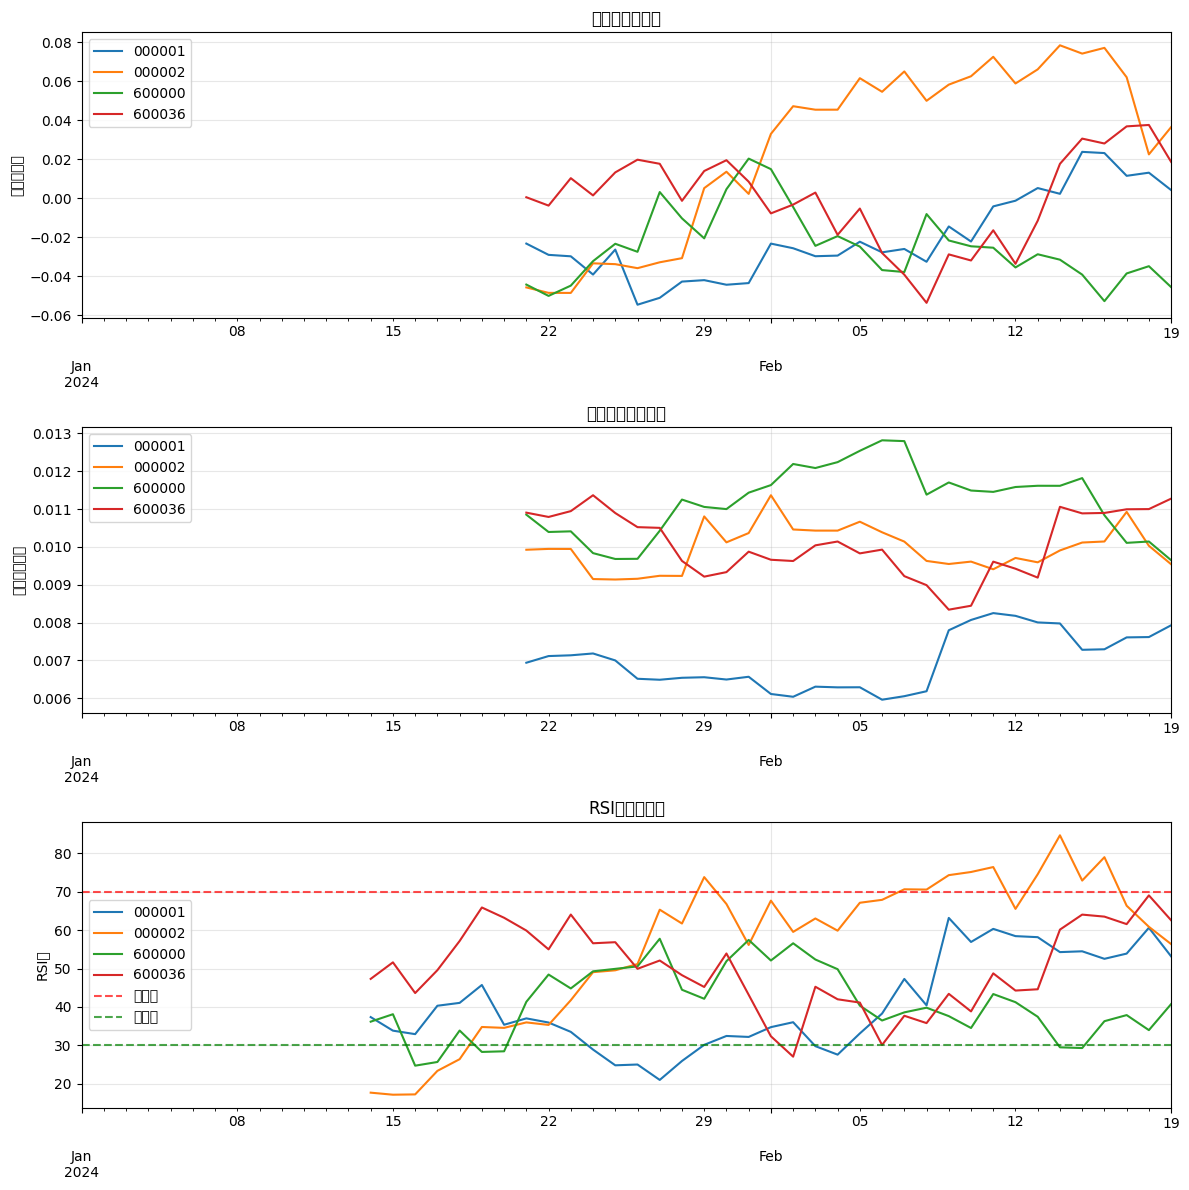

✅ 因子可视化完成


In [ ]:
# 因子可视化
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 动量因子图
momentum_factor.plot(ax=axes[0], title='动量因子时序图')
axes[0].set_ylabel('动量因子值')
axes[0].grid(True, alpha=0.3)

# 波动率因子图
volatility_factor.plot(ax=axes[1], title='波动率因子时序图')
axes[1].set_ylabel('波动率因子值')
axes[1].grid(True, alpha=0.3)

# RSI因子图
rsi_factor.plot(ax=axes[2], title='RSI因子时序图')
axes[2].set_ylabel('RSI值')
axes[2].axhline(y=70, color='r', linestyle='--', alpha=0.7, label='超买线')
axes[2].axhline(y=30, color='g', linestyle='--', alpha=0.7, label='超卖线')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 因子可视化完成")


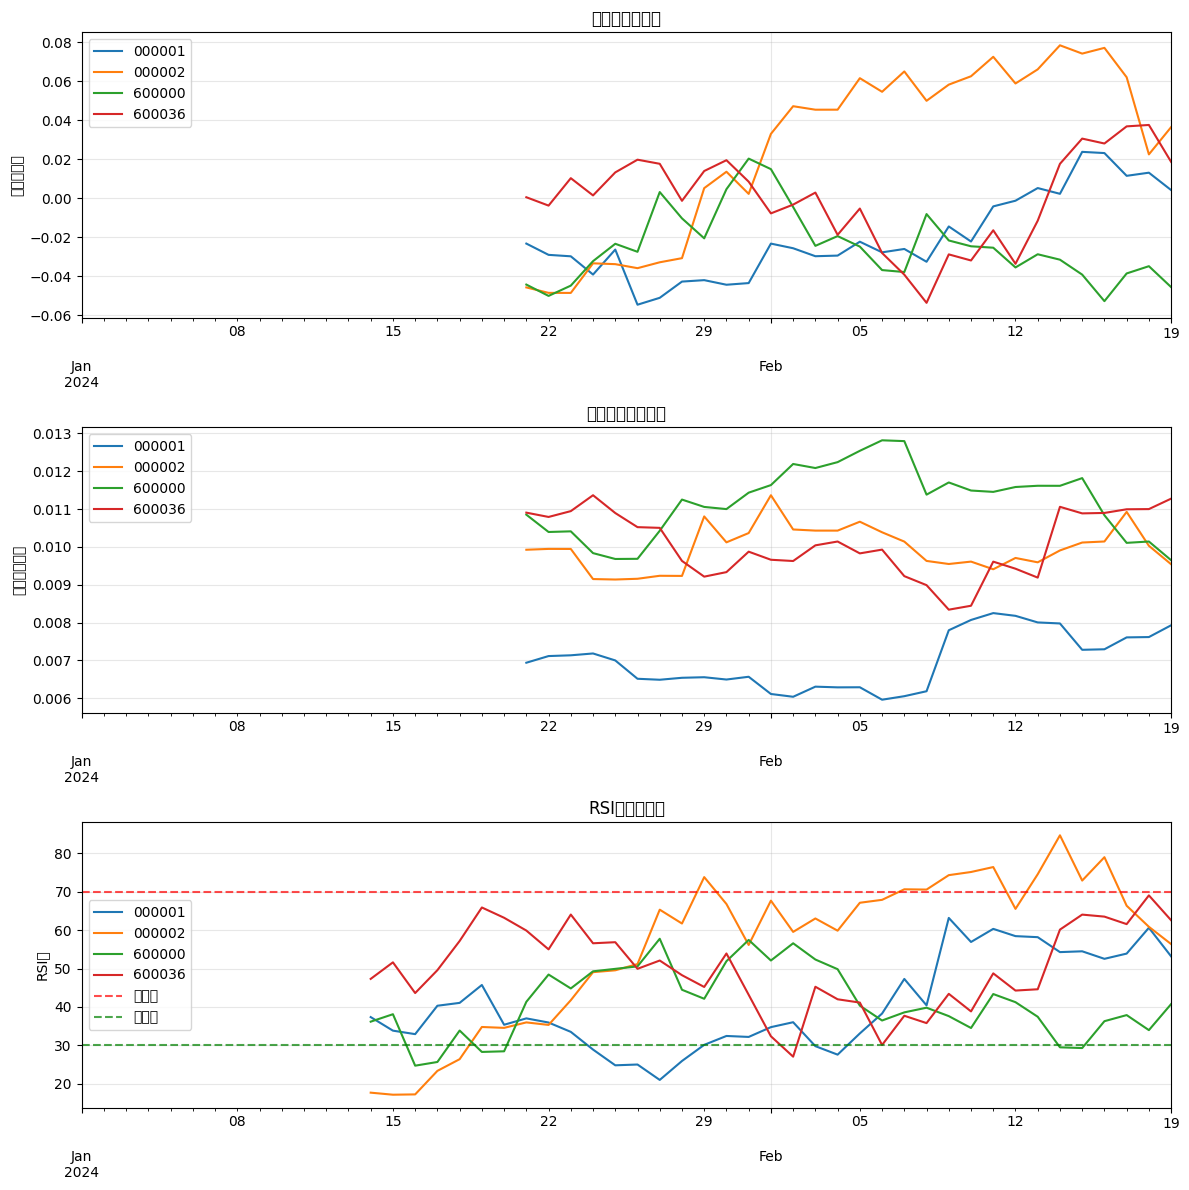

✅ 因子可视化完成


In [ ]:
# 因子可视化
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 动量因子图
momentum_factor.plot(ax=axes[0], title='动量因子时序图')
axes[0].set_ylabel('动量因子值')
axes[0].grid(True, alpha=0.3)

# 波动率因子图
volatility_factor.plot(ax=axes[1], title='波动率因子时序图')
axes[1].set_ylabel('波动率因子值')
axes[1].grid(True, alpha=0.3)

# RSI因子图
rsi_factor.plot(ax=axes[2], title='RSI因子时序图')
axes[2].set_ylabel('RSI值')
axes[2].axhline(y=70, color='r', linestyle='--', alpha=0.7, label='超买线')
axes[2].axhline(y=30, color='g', linestyle='--', alpha=0.7, label='超卖线')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 因子可视化完成")
